In [1]:
#Assignment 14
#Mohsin Essani
#Part 2


In [2]:
import requests  #This statement imports the requests library, which allows us to send HTTP requests and get the response

from bs4 import BeautifulSoup #This statement imports the BeautifulSoup library, which is a Python library used for web scraping purposes to pull data out of HTML and XML files.

from textblob import TextBlob  #This statement imports the TextBlob library, which is a Python library used for processing textual data.


import pandas as pd  #This statement imports the Pandas library

url = 'https://www.amazon.in/Lifelong-LLMG759-Titanium-750-Watt-Liquidizing/product-reviews/B09JNXHGQL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
response = requests.get(url, headers=headers)


#URL:This line defines the URL of the Amazon product page from which we want to scrape the reviews.

#Headers: This line sets the User-Agent header to mimic the behavior of a web browser while making a request to Amazon. 
#This helps to avoid being blocked by the server.

#Response: This line sends a GET request to the Amazon URL with the headers specified in the previous line and 
#stores the response in the variable 'response'.

#Soup: This line creates a BeautifulSoup object by passing the response content and the parser type as arguments.

#Reviews: This line finds all the div elements with the attribute data-hook equal to 'review' and stores 
#them in the variable 'reviews'. These div elements contain the review data we want to scrape from the page.


soup = BeautifulSoup(response.content, 'html.parser')
reviews = soup.find_all('div', {'data-hook': 'review'})





#The below code is processing the review data scraped from the Amazon product page, which is in the form of a list of BeautifulSoup objects called reviews.

In [3]:
reviews_list = []

for item in reviews:
    review = {
        'review_text': item.find('span', {'data-hook': 'review-body'}).text,
        'review_rating': float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '')),
    }
    reviews_list.append(review)

df = pd.DataFrame(reviews_list)




The below code applies sentiment analysis to the reviews in the Pandas DataFrame df.

It defines a function get_review_sentiment that takes a text as input and returns the sentiment of the text as either 'Positive', 'Neutral', or 'Negative'.

It then applies the get_review_sentiment function to the review_text column of the df DataFrame using the apply() method.

The resulting sentiment of each review is then stored in a new column called review_sentiment in the df DataFrame.

The review_sentiment column can be used for further analysis of the reviews, such as calculating the proportion of positive, negative, and neutral reviews, or for visualizing the sentiment distribution of the reviews.





In [4]:

def get_review_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['review_sentiment'] = df['review_text'].apply(get_review_sentiment)



The below code defines a function get_decision_maker that takes a rating and sentiment as input and returns a decision regarding the product based on the rating and sentiment.

In [5]:
def get_decision_maker(rating, sentiment):
    if rating <= 2:
        return 'Rebuild the product design'
    elif rating == 3:
        return 'Lower down the price'
    elif rating == 4:
        return 'Product is awesome'
    else:
        return 'Loved by everyone'

df['decision_maker'] = df.apply(lambda x: get_decision_maker(x['review_rating'], x['review_sentiment']), axis=1)



The positive_reviews and negative_reviews DataFrames can be used to analyze the positive and negative aspects of the product and to identify the strengths and weaknesses of the product, respectively.

In [6]:
positive_reviews = df[df['review_sentiment'] == 'Positive']
negative_reviews = df[df['review_sentiment'] == 'Negative']

print('Positive Reviews:')
print(positive_reviews)
print('\nNegative Reviews:')
print(negative_reviews)

Positive Reviews:
                                         review_text  review_rating  \
0  \nSince the day we bought it in April 22, the ...            3.0   
1  \nRecieved the product in good package, better...            4.0   
3  \nTeam, kindly improve the look of body qualit...            4.0   
5  \nIt’s a good looking product, sturdy and a gr...            4.0   
8  \nI only used this mixie.. for one time... And...            1.0   

  review_sentiment              decision_maker  
0         Positive        Lower down the price  
1         Positive          Product is awesome  
3         Positive          Product is awesome  
5         Positive          Product is awesome  
8         Positive  Rebuild the product design  

Negative Reviews:
                                         review_text  review_rating  \
9  \nThe product stopped working twice in 7 month...            1.0   

  review_sentiment              decision_maker  
9         Negative  Rebuild the product design  


In [7]:
df.tail()

,review_text,review_rating,review_sentiment,decision_maker
5,"\nIt’s a good looking product, sturdy and a gr...",4.0,Positive,Product is awesome
6,\nAffordable price with...best quality products\n,5.0,Neutral,Loved by everyone
7,"\n1) জে্ক ভাঙা ,ছিল।২) আমার রিটার্ন সামগ্রী এক...",1.0,Neutral,Rebuild the product design
8,\nI only used this mixie.. for one time... And...,1.0,Positive,Rebuild the product design
9,\nThe product stopped working twice in 7 month...,1.0,Negative,Rebuild the product design


In [8]:
#Visualizing and giving an insight on review. 
#This is done to observe the reviews and to work more efficiently on weaker section. 

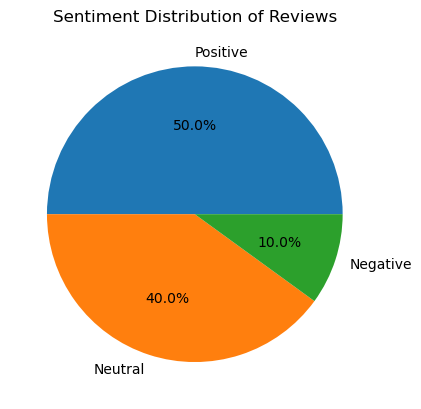

In [9]:
import matplotlib.pyplot as plt

sentiment_count = df['review_sentiment'].value_counts()
plt.pie(sentiment_count.values, labels=sentiment_count.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution of Reviews')
plt.show()



# As per the visualization of pie chart, 50% is positive reviews while 40% are neutral and 10% are negative. So if Amazon wants to increase the sale more, the company will have to make the product according to their customer demands. Also this reviews are system generated so 10-20% data can be mismatched. So that data should also be considered. 